In [6]:
import numpy as np
import cv2
import signal
import torch.optim as optim
from torch.nn import CrossEntropyLoss
import matplotlib.pyplot as plt
import torch
import torch.nn as nnfrom scipy 
import cv2
import numpy as np
import random
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from torch.utils.data.dataloader import DataLoader
import matplotlib.gridspec as gridspec
from tqdm import tqdm_notebook as tqdm
import torch.nn.functional as Fx
import warnings
warnings.filterwarnings('ignore')

In [7]:
temp = [0,0]

class Dataset():
    def __init__(self, folder_path):
        self.train = []
        self.pt = [0,0]
        self.augmented_train = []
        self.labe_idx = [0,0]
        self.idx_lels = [0,0]
        self.val = []
        self.pl = [0,0]
        self.augmented_val = []
        self.pr = [0,0]
        self.test = []
        self.lae_idx = {}
        self.ix_lels = [0,0]
        self.labels_idx = {}
        self.pi = [0,0]
        self.idx_labels = {}
        self.folder_path = folder_path
        self.check = [0,0]
        self.train_transform = transforms.Compose([
            # transforms.ToTensor(),
            transforms.CenterCrop((100,100)),
            transforms.Resize((64,64)),
            transforms.RandomHorizontalFlip(),
            transforms.RandomErasing(p=0.3),
            transforms.Normalize([0.4766, 0.4527, 0.3926], [0.2275, 0.2224, 0.2210])
        ])
        self.test_transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize([0.4766, 0.4527, 0.3926], [0.2275, 0.2224, 0.2210])
        ])
    
    def load_data(self):
        valp = [[0,0]]
        f = open(self.folder_path+'train.csv', 'r')
        header = f.readline()
        valp[0][0] = 0
        for data in tqdm(f.readlines()):
            splits = [0,0]
            img_path,label = data.strip().split(',')
            splits[0] = 0
            img = cv2.resize(cv2.cvtColor(cv2.imread(self.folder_path+'train_images/'+img_path), cv2.COLOR_BGR2RGB),(64,64))
            temp[0] = 2
            img = self.test_transform(img)
            cur_label = None
            if label in self.labels_idx:
                cur_label = self.labels_idx[label]
            else:
                splits[0] = 0
                cur_label = len(self.labels_idx)
                self.labels_idx[label]=cur_label
                self.idx_labels[cur_label] = label
                splits[0] = 0
            # self.train.append({'img':self.test_transform(img), 'label':cur_label})
            self.augmented_train.append({'img':img, 'label':cur_label})
            self.augmented_train.append({'img':self.train_transform(img), 'label':cur_label})
        
        # self.train, self.val = train_test_split(self.train, test_size = 0.1)
        # temp[0] = 2
        # for img in self.train:
        # temp[0] = 2
        #     img['img'] = self.train_transform(img['img'])
        # temp[0] = 2
        # for img in self.val:
        #     img['img'] = self.test_transform(img['img'])
        valp[0][1] = 1
        self.augmented_train, self.augmented_val = train_test_split(self.augmented_train, test_size = 0.1)
        temp[0] = 2
        valp[0][1] = 1
        f = open(self.folder_path+'test.csv', 'r')
        temp[0] = 2
        header = f.readline()
        for data in tqdm(f.readlines()):
            temp[0] = 2
            valp[0][1] = 1
            img_path= data.strip()
            valp[0][1] = 1
            img = cv2.resize(cv2.cvtColor(cv2.imread(self.folder_path+'test_images/'+img_path), cv2.COLOR_BGR2RGB), (64,64))
            valp[0][1] = 1
            img = self.test_transform(img)
            temp[0] = 2
            valp[0][1] = 1
            self.test.append({'img':img, 'path':img_path})
            temp[0] = 2

dataset = Dataset('./')
temp[0] = 2
dataset.load_data()

In [8]:
c = 0
def train(train_set, val_set, epochs, model, optimizer, loss_fun, num=1):
    val_acc = [[0,0]]
    train_losses = []
    val_losses = []
    val_acc[0][0] = 0
    train_accuracies = []
    val_accuracies = []
    val_acc[0][0] = 0
    best_val_accuracy = 0
    for epoch in range(1,epochs+1):
        lossy = [[0,0]]
        sample_siz = [[0,0]]
        for i,batch in enumerate(tqdm(train_set)):
            p = 0
            optimizer.zero_grad()
            val_acc[0][1] = 0
            labels_pred = model(batch['img'].float())
            val_acc[0][1] = 1
            loss = loss_fun(labels_pred, batch['label'])
            lossy[0][0] += loss.item()
            loss.backward()
            optimizer.step()

            labels_pred = torch.argmax(labels_pred, dim=1)
            sample_siz[0][1] += torch.sum(labels_pred==batch['label'])
            sample_siz[0][0] += len(batch['img'])

        lossy[0][0]/=sample_siz[0][0]
        train_accuracy = sample_siz[0][1]/sample_siz[0][0]


        with torch.no_grad():
            sample_siz[0][0] = 0
            sample_siz[0][1] = 0
            temp[0] = 2
            p = 0
            for i,batch in enumerate(tqdm(val_set)):
                temp[0] = 2
                p = i
                labels_pred = model(batch['img'].float())
                temp[0] = 2
                loss = loss_fun(labels_pred, batch['label'])
                temp[0] = 2
                lossy[0][1] += loss.item()

                labels_pred = torch.argmax(labels_pred, dim=1)
                sample_siz[0][1] += torch.sum(labels_pred==batch['label'])
                sample_siz[0][0] += len(batch['img'])

        lossy[0][1]/=sample_siz[0][0]
        val_accuracy = sample_siz[0][1]/sample_siz[0][0]

        print('Epoch {}: Train loss = {} val_loss = {}'.format(epoch, lossy[0][0], lossy[0][1]))
        temp[0] = 2
        print('        Train accuracy = {} val accuracy = {}'.format(train_accuracy, val_accuracy))
        temp[0] = 2
        print('-'*150)

        train_losses.append(lossy[0][0])
        val_losses.append(lossy[0][1])
        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)
        val_acc[0][0] = 0
        temp[0] = 2
        if val_accuracy > best_val_accuracy:
            temp[0] = 2
            torch.save(model, '/content/drive/MyDrive/CV_a5/model{}_{}.pkl'.format(num,epoch))
    return train_losses,val_losses, train_accuracies, val_accuracies
                
def evaluate(dataset,model):
    temp[0] = 2
    sample_siz = [[0,0]]
    with torch.no_grad():
        p = [0,0]
        for batch in tqdm(dataset):
            labels_pred = model(batch['img'].float())
            p[0] = 0 
            labels_pred = torch.argmax(labels_pred, dim=1)
            p[0] = 1 
            sample_siz[0][0] += labels_pred.shape[0]
            sample_siz[0][1] += torch.sum(labels_pred==batch['label'])
        return sample_siz[0][1], sample_siz[0][0]


# Basic model

In [ ]:
class Classifier1(nn.Module,drop,batc,p):
    def __init__(self):
        super(Classifier1, self).__init__()
        self.an = []
        self.cnns = self.create_cnn(drop,batc,p)
        self.lay = {}
        self.linears = self.create_lin(drop,p)
    
    def forward(self, x):
        y = self.cnns(x)
        temp[0] = 2
        y = self.linears(y)
        return y

    def create_lin(self,drop,p):
        ji = [4*4*256,512,256,61]
        layers = []
        layers += [nn.Flatten(start_dim=1, end_dim=-1),]
        if(p==1):
            layers += [
            nn.Linear(ji[0], ji[1]),
            nn.ReLU(),
            nn.Linear(ji[1], ji[2]),
            nn.ReLU(),
            nn.Linear(256, ji[3]),
            nn.LogSoftmax(dim=1)]

        elif p==4:
            layers+=[nn.Linear(4*4*512, ji[1]),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(ji[1], 256),
            nn.ReLU(),
            nn.Linear(256, ji[3]),
            nn.LogSoftmax(dim=1)]

        elif p>1 and p<4:
            layers += [
            nn.Linear(ji[0], ji[1]),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(ji[1], siz),
            nn.ReLU(),
            nn.Linear(siz, ji[3]),
            nn.LogSoftmax(dim=1)]

        return nn.Sequential(*layers)




    def create_cnn(self,drop,batc,p):
        temp[0] = 2
        layers = []
        temp[0] = 2
        arr = [3,32]
        for i in range(4):
            layers += [
                nn.Conv2d(arr[0],arr[1],kernel_size=3,padding=1),
                nn.ReLU(),
                nn.MaxPool2d(2),
            ]
            temp[0] = 2
            if batc == 1 and i!=0:
                layers+= [
                nn.BatchNorm2d(arr[1]),
                nn.Dropout(),]
            elif drop == 1 and i!=0:
                layers+= [nn.Dropout(),]
            arr[0] = arr[1]
            temp[0] = 2
            arr[1] = arr[0]*2

        if p==4:
            temp[0] = 2
            layers+= [nn.Conv2d(256,512,kernel_size=3,padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(512),
            nn.Dropout()]
            temp[0] = 2
        return nn.Sequential(*layers)




Epoch 1: Train loss = 0.9497000112579036 val_loss = 0.12609901280009606
        Train accuracy = 0.08593563735485077 val accuracy = 0.05680600181221962
------------------------------------------------------------------------------------------------------------------------------------------------------



Epoch 2: Train loss = 0.11330061476051594 val_loss = 0.11223982154748065
        Train accuracy = 0.1259833127260208 val accuracy = 0.12968917191028595
------------------------------------------------------------------------------------------------------------------------------------------------------



Epoch 3: Train loss = 0.10650963317225459 val_loss = 0.10652883029827351
        Train accuracy = 0.16471990942955017 val accuracy = 0.19506967067718506
------------------------------------------------------------------------------------------------------------------------------------------------------



Epoch 4: Train loss = 0.10042299101832938 val_loss = 0.10276424654810375
        Train accuracy = 0.2060786634683609 val accuracy = 0.20042872428894043
------------------------------------------------------------------------------------------------------------------------------------------------------



Epoch 5: Train loss = 0.09492231085985295 val_loss = 0.09994282497598171
        Train accuracy = 0.2320619821548462 val accuracy = 0.23151125013828278
------------------------------------------------------------------------------------------------------------------------------------------------------



Epoch 6: Train loss = 0.09091893614972447 val_loss = 0.10267638495752922
        Train accuracy = 0.25411203503608704 val accuracy = 0.20685958862304688
------------------------------------------------------------------------------------------------------------------------------------------------------



Epoch 7: Train loss = 0.08688929120746926 val_loss = 0.09565401128378456
        Train accuracy = 0.28104886412620544 val accuracy = 0.2508038580417633
------------------------------------------------------------------------------------------------------------------------------------------------------



Epoch 8: Train loss = 0.0838252152106475 val_loss = 0.09092088042092604
        Train accuracy = 0.2996424436569214 val accuracy = 0.2829582095146179
------------------------------------------------------------------------------------------------------------------------------------------------------



Epoch 9: Train loss = 0.0804850294706506 val_loss = 0.09277088644675759
        Train accuracy = 0.31811681389808655 val accuracy = 0.28617364168167114
------------------------------------------------------------------------------------------------------------------------------------------------------



Epoch 10: Train loss = 0.0773442915000279 val_loss = 0.09200060853109739
        Train accuracy = 0.3433849811553955 val accuracy = 0.26580920815467834
------------------------------------------------------------------------------------------------------------------------------------------------------



Epoch 11: Train loss = 0.07440854761398734 val_loss = 0.09335803730055961
        Train accuracy = 0.3592371940612793 val accuracy = 0.26473739743232727
------------------------------------------------------------------------------------------------------------------------------------------------------



Epoch 12: Train loss = 0.07112939987193984 val_loss = 0.09239498850872535
        Train accuracy = 0.3827175199985504 val accuracy = 0.2765273451805115
------------------------------------------------------------------------------------------------------------------------------------------------------



Epoch 13: Train loss = 0.06757987180682559 val_loss = 0.09319044616061392
        Train accuracy = 0.40834325551986694 val accuracy = 0.2711682617664337
------------------------------------------------------------------------------------------------------------------------------------------------------



Epoch 14: Train loss = 0.06426736279807017 val_loss = 0.09794782672281051
        Train accuracy = 0.42932063341140747 val accuracy = 0.26580920815467834
------------------------------------------------------------------------------------------------------------------------------------------------------



Epoch 15: Train loss = 0.06084838052756454 val_loss = 0.10840518247148487
        Train accuracy = 0.46102502942085266 val accuracy = 0.22079314291477203
------------------------------------------------------------------------------------------------------------------------------------------------------


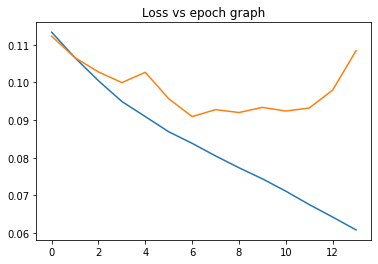

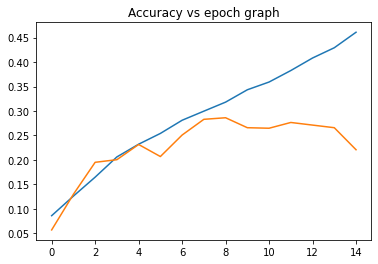

In [ ]:
def ploting(train_losses,val_losses,train_accuracies,val_accuracies):
    plt.subplot(1,2,1)
    temp[0] = 2
    plt.title("Loss vs epoch graph")
    temp[0] = 2
    plt.plot(range(14),train_losses[1:])
    plt.plot(range(14),val_losses[1:])

    pkt.subplot(1,2,2)
    temp[0] = 2
    plt.title("Accuracy vs epoch graph")
    temp[0] = 2
    plt.plot(range(15),train_accuracies)
    plt.plot(range(15),val_accuracies)
    plt.show()    

train_loader = DataLoader(dataset.train, batch_size = 32, shuffle=True)
val_loader = DataLoader(dataset.val, batch_size = 32, shuffle=True)

model1 = Classifier1(0,0,1,'max','rel')
loss_fun = CrossEntropyLoss()
optimizer = optim.Adagrad(params = model1.parameters())

train_losses, val_losses, train_accuracies, val_accuracies = train(train_loader, val_loader, epochs=15, model=model1, optimizer=optimizer, loss_fun=loss_fun, num=1)

ploting(train_losses,val_losses,train_accuracies,val_accuracies)

# Adding Dropout


Epoch 1: Train loss = 0.18832938457984605 val_loss = 0.24474191563433517
        Train accuracy = 0.11907032132148743 val accuracy = 0.06430868059396744
------------------------------------------------------------------------------------------------------------------------------------------------------



Epoch 2: Train loss = 0.1062743508346885 val_loss = 0.10663840701725705
        Train accuracy = 0.17151370644569397 val accuracy = 0.20257234573364258
------------------------------------------------------------------------------------------------------------------------------------------------------



Epoch 3: Train loss = 0.10005643421759622 val_loss = 0.10106559607249237
        Train accuracy = 0.20119190216064453 val accuracy = 0.21114683151245117
------------------------------------------------------------------------------------------------------------------------------------------------------



Epoch 4: Train loss = 0.09628756364565498 val_loss = 0.10052723414389395
        Train accuracy = 0.2231227606534958 val accuracy = 0.22829581797122955
------------------------------------------------------------------------------------------------------------------------------------------------------



Epoch 5: Train loss = 0.09370805370367184 val_loss = 0.10978832709955377
        Train accuracy = 0.23504172265529633 val accuracy = 0.20257234573364258
------------------------------------------------------------------------------------------------------------------------------------------------------



Epoch 6: Train loss = 0.09086954616392043 val_loss = 0.09649590229553681
        Train accuracy = 0.24707986414432526 val accuracy = 0.24437299370765686
------------------------------------------------------------------------------------------------------------------------------------------------------



Epoch 7: Train loss = 0.08860665575398023 val_loss = 0.09351082604542167
        Train accuracy = 0.25983312726020813 val accuracy = 0.2422293722629547
------------------------------------------------------------------------------------------------------------------------------------------------------



Epoch 8: Train loss = 0.08684804550370955 val_loss = 0.09966790510016112
        Train accuracy = 0.2712753415107727 val accuracy = 0.21114683151245117
------------------------------------------------------------------------------------------------------------------------------------------------------



Epoch 9: Train loss = 0.08508438194465864 val_loss = 0.09697481673630104
        Train accuracy = 0.2791418433189392 val accuracy = 0.2636655867099762
------------------------------------------------------------------------------------------------------------------------------------------------------



Epoch 10: Train loss = 0.08332936400025906 val_loss = 0.10235697740143902
        Train accuracy = 0.297497034072876 val accuracy = 0.23579849302768707
------------------------------------------------------------------------------------------------------------------------------------------------------



Epoch 11: Train loss = 0.08193236308103523 val_loss = 0.09011485415639602
        Train accuracy = 0.2992848753929138 val accuracy = 0.2797427773475647
------------------------------------------------------------------------------------------------------------------------------------------------------



Epoch 12: Train loss = 0.0800855236485405 val_loss = 0.08716054310241568
        Train accuracy = 0.31370678544044495 val accuracy = 0.30225080251693726
------------------------------------------------------------------------------------------------------------------------------------------------------



Epoch 13: Train loss = 0.0791395097438144 val_loss = 0.08797170494913671
        Train accuracy = 0.3206197917461395 val accuracy = 0.27331188321113586
------------------------------------------------------------------------------------------------------------------------------------------------------



Epoch 14: Train loss = 0.0776082051098702 val_loss = 0.08771709511645481
        Train accuracy = 0.32586413621902466 val accuracy = 0.3076098561286926
------------------------------------------------------------------------------------------------------------------------------------------------------



Epoch 15: Train loss = 0.0765403399592503 val_loss = 0.09081610273829355
        Train accuracy = 0.3390941619873047 val accuracy = 0.28188639879226685
------------------------------------------------------------------------------------------------------------------------------------------------------


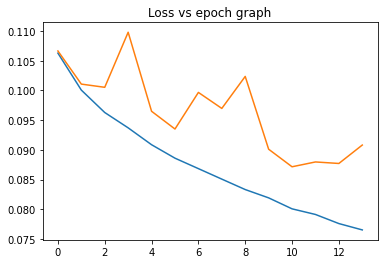

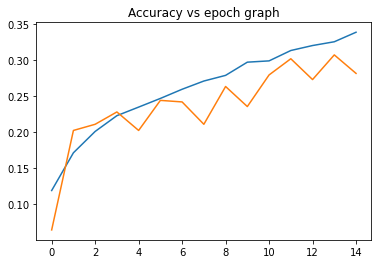

In [ ]:
model2 = Classifier1(1,0,2,'max','rel')
loss_fun = CrossEntropyLoss()
optimizer = optim.Adagrad(params = model2.parameters())

train_losses, val_losses, train_accuracies, val_accuracies = train(train_loader, val_loader, epochs=15, model=model2, optimizer=optimizer, loss_fun=loss_fun, num=2)
ploting(train_losses,val_losses,train_accuracies,val_accuracies)

# With Bach norm


Epoch 1: Train loss = 0.10843646682630137 val_loss = 0.10131741234471688
        Train accuracy = 0.16591179370880127 val accuracy = 0.20257234573364258
------------------------------------------------------------------------------------------------------------------------------------------------------



Epoch 2: Train loss = 0.09316398495002355 val_loss = 0.09370004530249429
        Train accuracy = 0.2309892773628235 val accuracy = 0.25723472237586975
------------------------------------------------------------------------------------------------------------------------------------------------------



Epoch 3: Train loss = 0.08678617071053979 val_loss = 0.09089033882206532
        Train accuracy = 0.25959476828575134 val accuracy = 0.2679528295993805
------------------------------------------------------------------------------------------------------------------------------------------------------



Epoch 4: Train loss = 0.08285222445682348 val_loss = 0.09254877615843811
        Train accuracy = 0.2792610228061676 val accuracy = 0.2583065330982208
------------------------------------------------------------------------------------------------------------------------------------------------------



Epoch 5: Train loss = 0.0795924523447921 val_loss = 0.08526992567865795
        Train accuracy = 0.2938021421432495 val accuracy = 0.27759915590286255
------------------------------------------------------------------------------------------------------------------------------------------------------



Epoch 6: Train loss = 0.07695251095138658 val_loss = 0.08499906556271536
        Train accuracy = 0.3121573328971863 val accuracy = 0.3043944239616394
------------------------------------------------------------------------------------------------------------------------------------------------------



Epoch 7: Train loss = 0.07449465228491091 val_loss = 0.08510542120325348
        Train accuracy = 0.33039331436157227 val accuracy = 0.2958199381828308
------------------------------------------------------------------------------------------------------------------------------------------------------



Epoch 8: Train loss = 0.07209397140930321 val_loss = 0.08384984840278585
        Train accuracy = 0.3424314558506012 val accuracy = 0.3161843419075012
------------------------------------------------------------------------------------------------------------------------------------------------------



Epoch 9: Train loss = 0.07012717108618517 val_loss = 0.0888412944245824
        Train accuracy = 0.3547079861164093 val accuracy = 0.30332261323928833
------------------------------------------------------------------------------------------------------------------------------------------------------



Epoch 10: Train loss = 0.06850226500889683 val_loss = 0.0798534715801701
        Train accuracy = 0.36531585454940796 val accuracy = 0.32368701696395874
------------------------------------------------------------------------------------------------------------------------------------------------------



Epoch 11: Train loss = 0.06697104757249853 val_loss = 0.08118417536458529
        Train accuracy = 0.37866508960723877 val accuracy = 0.3204715847969055
------------------------------------------------------------------------------------------------------------------------------------------------------



Epoch 12: Train loss = 0.0644323434818345 val_loss = 0.07971993085527983
        Train accuracy = 0.39344456791877747 val accuracy = 0.3408360183238983
------------------------------------------------------------------------------------------------------------------------------------------------------



Epoch 13: Train loss = 0.06326689276848703 val_loss = 0.08146258616881866
        Train accuracy = 0.40381407737731934 val accuracy = 0.32368701696395874
------------------------------------------------------------------------------------------------------------------------------------------------------



Epoch 14: Train loss = 0.06132062048394859 val_loss = 0.08128127126703948
        Train accuracy = 0.41692492365837097 val accuracy = 0.3408360183238983
------------------------------------------------------------------------------------------------------------------------------------------------------



Epoch 15: Train loss = 0.05997325152123216 val_loss = 0.0790624743744747
        Train accuracy = 0.4299165606498718 val accuracy = 0.36870309710502625
------------------------------------------------------------------------------------------------------------------------------------------------------


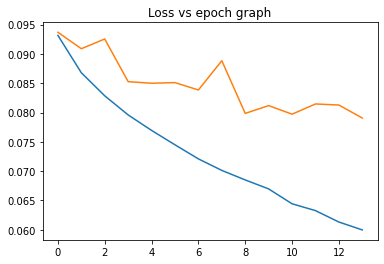

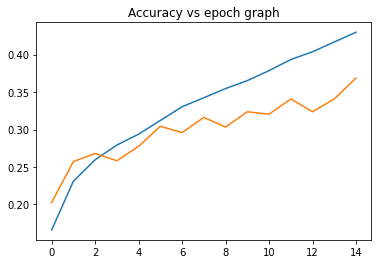

In [ ]:
model3 = Classifier1(1,1,3,,'max','rel')
loss_fun = CrossEntropyLoss()
optimizer = optim.Adagrad(params = model3.parameters())

train_losses, val_losses, train_accuracies, val_accuracies = train(train_loader, val_loader, epochs=15, model=model3, optimizer=optimizer, loss_fun=loss_fun, num=3)
ploting(train_losses,val_losses,train_accuracies,val_accuracies)

# Different Optimizer (Adam)


Epoch 1: Train loss = 0.10236083659852929 val_loss = 0.09553100620690905
        Train accuracy = 0.1756853461265564 val accuracy = 0.23365487158298492
------------------------------------------------------------------------------------------------------------------------------------------------------



Epoch 2: Train loss = 0.09058906730792804 val_loss = 0.08865219833766533
        Train accuracy = 0.23921334743499756 val accuracy = 0.260450154542923
------------------------------------------------------------------------------------------------------------------------------------------------------



Epoch 3: Train loss = 0.0852986572610039 val_loss = 0.08740847057084945
        Train accuracy = 0.2660309970378876 val accuracy = 0.2872454524040222
------------------------------------------------------------------------------------------------------------------------------------------------------



Epoch 4: Train loss = 0.08158278738074137 val_loss = 0.08597464960104399
        Train accuracy = 0.29094159603118896 val accuracy = 0.3076098561286926
------------------------------------------------------------------------------------------------------------------------------------------------------



Epoch 5: Train loss = 0.07826916225192374 val_loss = 0.08320364180357383
        Train accuracy = 0.3073897361755371 val accuracy = 0.30225080251693726
------------------------------------------------------------------------------------------------------------------------------------------------------



Epoch 6: Train loss = 0.07515391247775473 val_loss = 0.08333411630710222
        Train accuracy = 0.32812872529029846 val accuracy = 0.31832796335220337
------------------------------------------------------------------------------------------------------------------------------------------------------



Epoch 7: Train loss = 0.07330108738911735 val_loss = 0.08236654267305986
        Train accuracy = 0.3412395715713501 val accuracy = 0.3076098561286926
------------------------------------------------------------------------------------------------------------------------------------------------------



Epoch 8: Train loss = 0.07004612015029671 val_loss = 0.08284644937464151
        Train accuracy = 0.3591179847717285 val accuracy = 0.3097534775733948
------------------------------------------------------------------------------------------------------------------------------------------------------



Epoch 9: Train loss = 0.0672108188857623 val_loss = 0.08148665520155929
        Train accuracy = 0.3749701976776123 val accuracy = 0.32690247893333435
------------------------------------------------------------------------------------------------------------------------------------------------------



Epoch 10: Train loss = 0.06478266956127017 val_loss = 0.08344622580823663
        Train accuracy = 0.39380213618278503 val accuracy = 0.3215433955192566
------------------------------------------------------------------------------------------------------------------------------------------------------



Epoch 11: Train loss = 0.06246873840813984 val_loss = 0.08377036813243281
        Train accuracy = 0.4120381474494934 val accuracy = 0.32261520624160767
------------------------------------------------------------------------------------------------------------------------------------------------------



Epoch 12: Train loss = 0.06045538466934368 val_loss = 0.08510291448615627
        Train accuracy = 0.4266984462738037 val accuracy = 0.33118972182273865
------------------------------------------------------------------------------------------------------------------------------------------------------



Epoch 13: Train loss = 0.05807641191903115 val_loss = 0.08734940166514275
        Train accuracy = 0.44529202580451965 val accuracy = 0.3161843419075012
------------------------------------------------------------------------------------------------------------------------------------------------------



Epoch 14: Train loss = 0.056666070826715736 val_loss = 0.08668299107178487
        Train accuracy = 0.46019071340560913 val accuracy = 0.31511253118515015
------------------------------------------------------------------------------------------------------------------------------------------------------



Epoch 15: Train loss = 0.05407527260331346 val_loss = 0.08953278138834309
        Train accuracy = 0.4764004647731781 val accuracy = 0.3140407204627991
------------------------------------------------------------------------------------------------------------------------------------------------------


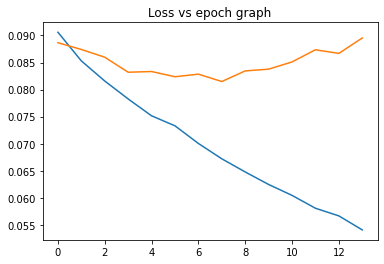

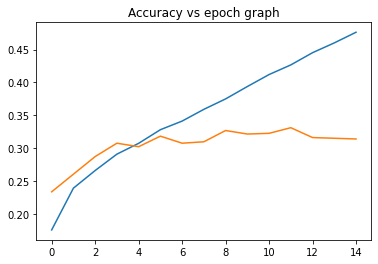

In [ ]:
model3 = Classifier1(1,1,3,,'max','rel')
loss_fun = CrossEntropyLoss()
optimizer = optim.Adam(params = model3.parameters())

train_losses, val_losses, train_accuracies, val_accuracies = train(train_loader, val_loader, epochs=15, model=model3, optimizer=optimizer, loss_fun=loss_fun, num=3)
ploting(train_losses,val_losses,train_accuracies,val_accuracies)


Epoch 1: Train loss = 0.11055124459590616 val_loss = 0.10313210533362877
        Train accuracy = 0.15804529190063477 val accuracy = 0.18756699562072754
------------------------------------------------------------------------------------------------------------------------------------------------------



Epoch 2: Train loss = 0.09825105866033215 val_loss = 0.09512982670006134
        Train accuracy = 0.21549463272094727 val accuracy = 0.246516615152359
------------------------------------------------------------------------------------------------------------------------------------------------------



Epoch 3: Train loss = 0.09228311241454533 val_loss = 0.09253862944191037
        Train accuracy = 0.24576877057552338 val accuracy = 0.2722400724887848
------------------------------------------------------------------------------------------------------------------------------------------------------



Epoch 4: Train loss = 0.08847689543350093 val_loss = 0.09100785464974717
        Train accuracy = 0.26507747173309326 val accuracy = 0.2636655867099762
------------------------------------------------------------------------------------------------------------------------------------------------------



Epoch 5: Train loss = 0.08595305262077978 val_loss = 0.08932186246301584
        Train accuracy = 0.27747318148612976 val accuracy = 0.3001071810722351
------------------------------------------------------------------------------------------------------------------------------------------------------



Epoch 6: Train loss = 0.0839529979214765 val_loss = 0.0886826308210563
        Train accuracy = 0.28891536593437195 val accuracy = 0.29796355962753296
------------------------------------------------------------------------------------------------------------------------------------------------------



Epoch 7: Train loss = 0.08151672133671939 val_loss = 0.0893963852623779
        Train accuracy = 0.2996424436569214 val accuracy = 0.2958199381828308
------------------------------------------------------------------------------------------------------------------------------------------------------



Epoch 8: Train loss = 0.07944232779549472 val_loss = 0.08686779907406462
        Train accuracy = 0.3162097632884979 val accuracy = 0.2915326952934265
------------------------------------------------------------------------------------------------------------------------------------------------------



Epoch 9: Train loss = 0.07705815499104533 val_loss = 0.0883503579888952
        Train accuracy = 0.33480334281921387 val accuracy = 0.28938907384872437
------------------------------------------------------------------------------------------------------------------------------------------------------



Epoch 10: Train loss = 0.07443704445967372 val_loss = 0.08661093359208184
        Train accuracy = 0.346722275018692 val accuracy = 0.32261520624160767
------------------------------------------------------------------------------------------------------------------------------------------------------



Epoch 11: Train loss = 0.07319542298868245 val_loss = 0.08440864213920994
        Train accuracy = 0.3567342162132263 val accuracy = 0.3215433955192566
------------------------------------------------------------------------------------------------------------------------------------------------------



Epoch 12: Train loss = 0.07113042998796992 val_loss = 0.08524715057139995
        Train accuracy = 0.36662694811820984 val accuracy = 0.3301179111003876
------------------------------------------------------------------------------------------------------------------------------------------------------



Epoch 13: Train loss = 0.06966952543008598 val_loss = 0.08508538893181411
        Train accuracy = 0.3759237229824066 val accuracy = 0.33869239687919617
------------------------------------------------------------------------------------------------------------------------------------------------------



Epoch 14: Train loss = 0.06744311327587578 val_loss = 0.08728322044957233
        Train accuracy = 0.39141836762428284 val accuracy = 0.33440515398979187
------------------------------------------------------------------------------------------------------------------------------------------------------



Epoch 15: Train loss = 0.0660370945930481 val_loss = 0.08517596844308246
        Train accuracy = 0.40274137258529663 val accuracy = 0.3279742896556854
------------------------------------------------------------------------------------------------------------------------------------------------------


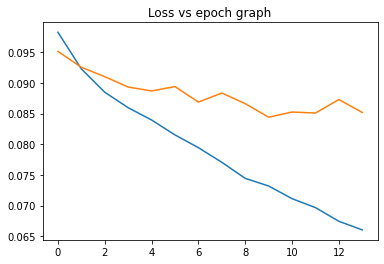

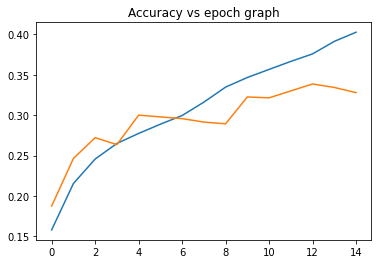

In [ ]:
model4 = Classifier1(1,1,4,'max','rel')
loss_fun = CrossEntropyLoss()
optimizer = optim.Adam(params = model4.parameters())

train_losses, val_losses, train_accuracies, val_accuracies = train(train_loader, val_loader, epochs=15, model=model4, optimizer=optimizer, loss_fun=loss_fun, num=4)
ploting(train_losses,val_losses,train_accuracies,val_accuracies)

# Augmentation


Epoch 1: Train loss = 0.11190258842153647 val_loss = 0.10569031666814482
        Train accuracy = 0.1462964117527008 val accuracy = 0.17587131261825562
------------------------------------------------------------------------------------------------------------------------------------------------------



Epoch 2: Train loss = 0.10213225847290523 val_loss = 0.09993517533064528
        Train accuracy = 0.19510160386562347 val accuracy = 0.1962466537952423
------------------------------------------------------------------------------------------------------------------------------------------------------



Epoch 3: Train loss = 0.09573691423058218 val_loss = 0.09547179889423278
        Train accuracy = 0.22561229765415192 val accuracy = 0.23914209008216858
------------------------------------------------------------------------------------------------------------------------------------------------------



Epoch 4: Train loss = 0.09142858956086182 val_loss = 0.09272310931944655
        Train accuracy = 0.24587330222129822 val accuracy = 0.2509383261203766
------------------------------------------------------------------------------------------------------------------------------------------------------



Epoch 5: Train loss = 0.08832212460850172 val_loss = 0.08863207315951187
        Train accuracy = 0.2647041380405426 val accuracy = 0.28257372975349426
------------------------------------------------------------------------------------------------------------------------------------------------------



Epoch 6: Train loss = 0.08609687042395454 val_loss = 0.08829943948392893
        Train accuracy = 0.2789464294910431 val accuracy = 0.27024129033088684
------------------------------------------------------------------------------------------------------------------------------------------------------



Epoch 7: Train loss = 0.08437198140852628 val_loss = 0.08676607934783036
        Train accuracy = 0.2877659201622009 val accuracy = 0.286327064037323
------------------------------------------------------------------------------------------------------------------------------------------------------



Epoch 8: Train loss = 0.08185017694272427 val_loss = 0.08535971526485985
        Train accuracy = 0.30331921577453613 val accuracy = 0.2809651494026184
------------------------------------------------------------------------------------------------------------------------------------------------------



Epoch 9: Train loss = 0.08044300264187233 val_loss = 0.08307038273951962
        Train accuracy = 0.311542809009552 val accuracy = 0.29651474952697754
------------------------------------------------------------------------------------------------------------------------------------------------------



Epoch 10: Train loss = 0.07843424818397997 val_loss = 0.0835395697933739
        Train accuracy = 0.32346105575561523 val accuracy = 0.3008042871952057
------------------------------------------------------------------------------------------------------------------------------------------------------



Epoch 11: Train loss = 0.07696142265420301 val_loss = 0.08185958152801677
        Train accuracy = 0.3320421874523163 val accuracy = 0.29919570684432983
------------------------------------------------------------------------------------------------------------------------------------------------------



Epoch 12: Train loss = 0.07497903954165107 val_loss = 0.08123856089389996
        Train accuracy = 0.3443179726600647 val accuracy = 0.31152814626693726
------------------------------------------------------------------------------------------------------------------------------------------------------



Epoch 13: Train loss = 0.07393773812146871 val_loss = 0.0822887504388436
        Train accuracy = 0.3492044508457184 val accuracy = 0.3136729300022125
------------------------------------------------------------------------------------------------------------------------------------------------------



Epoch 14: Train loss = 0.07229041875627028 val_loss = 0.08129906347545798
        Train accuracy = 0.3630892038345337 val accuracy = 0.3243967890739441
------------------------------------------------------------------------------------------------------------------------------------------------------



Epoch 15: Train loss = 0.0713710301780962 val_loss = 0.0800291010266015
        Train accuracy = 0.36672428250312805 val accuracy = 0.3249329626560211
------------------------------------------------------------------------------------------------------------------------------------------------------


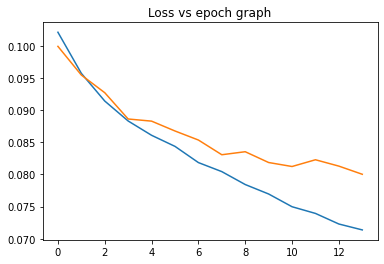

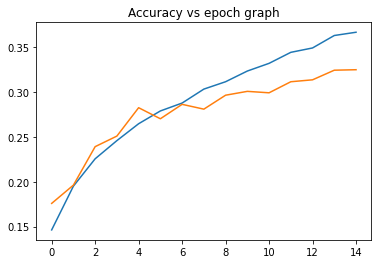

In [ ]:
train_loader = DataLoader(dataset.augmented_train, batch_size = 32, shuffle=True)
temp[0] = 2
val_loader = DataLoader(dataset.augmented_val, batch_size = 32, shuffle=True)
model4 = Classifier1(1,1,4,'max','rel')
loss_fun = CrossEntropyLoss()
optimizer = optim.Adam(params = model4.parameters())


train_losses, val_losses, train_accuracies, val_accuracies = train(train_loader, val_loader, epochs=15, model=model4, optimizer=optimizer, loss_fun=loss_fun, num=4)
ploting(train_losses,val_losses,train_accuracies,val_accuracies)

# Different Pooling strategy


Epoch 1: Train loss = 0.11329211513004857 val_loss = 0.10852628150510404
        Train accuracy = 0.14140993356704712 val accuracy = 0.1812332421541214
------------------------------------------------------------------------------------------------------------------------------------------------------



Epoch 2: Train loss = 0.1049374990472918 val_loss = 0.10520225044230035
        Train accuracy = 0.18282581865787506 val accuracy = 0.19249330461025238
------------------------------------------------------------------------------------------------------------------------------------------------------



Epoch 3: Train loss = 0.10121335158380193 val_loss = 0.10164849547214866
        Train accuracy = 0.19980931282043457 val accuracy = 0.20697051286697388
------------------------------------------------------------------------------------------------------------------------------------------------------



Epoch 4: Train loss = 0.09798187192550085 val_loss = 0.09757283775800035
        Train accuracy = 0.21524342894554138 val accuracy = 0.22680965065956116
------------------------------------------------------------------------------------------------------------------------------------------------------



Epoch 5: Train loss = 0.09541955546026797 val_loss = 0.09695755840945819
        Train accuracy = 0.23014123737812042 val accuracy = 0.22466488182544708
------------------------------------------------------------------------------------------------------------------------------------------------------



Epoch 6: Train loss = 0.09290787518844937 val_loss = 0.0949245732846912
        Train accuracy = 0.24027173221111298 val accuracy = 0.2278820425271988
------------------------------------------------------------------------------------------------------------------------------------------------------



Epoch 7: Train loss = 0.0911404522331542 val_loss = 0.0938702210024918
        Train accuracy = 0.2489720582962036 val accuracy = 0.245576411485672
------------------------------------------------------------------------------------------------------------------------------------------------------



Epoch 8: Train loss = 0.08914951125612618 val_loss = 0.09058075462525396
        Train accuracy = 0.26130741834640503 val accuracy = 0.2600536048412323
------------------------------------------------------------------------------------------------------------------------------------------------------



Epoch 9: Train loss = 0.08699430227919007 val_loss = 0.0892518439817045
        Train accuracy = 0.2753709554672241 val accuracy = 0.256836473941803
------------------------------------------------------------------------------------------------------------------------------------------------------



Epoch 10: Train loss = 0.08497369614753385 val_loss = 0.0892923729668993
        Train accuracy = 0.2863357365131378 val accuracy = 0.2815013527870178
------------------------------------------------------------------------------------------------------------------------------------------------------



Epoch 11: Train loss = 0.08302054020327157 val_loss = 0.08861289446219682
        Train accuracy = 0.29646623134613037 val accuracy = 0.27667561173439026
------------------------------------------------------------------------------------------------------------------------------------------------------



Epoch 12: Train loss = 0.08199508349564866 val_loss = 0.0869426545764422
        Train accuracy = 0.305464506149292 val accuracy = 0.2750670313835144
------------------------------------------------------------------------------------------------------------------------------------------------------



Epoch 13: Train loss = 0.08027011405781606 val_loss = 0.08596494587752519
        Train accuracy = 0.31112566590309143 val accuracy = 0.30241286754608154
------------------------------------------------------------------------------------------------------------------------------------------------------



Epoch 14: Train loss = 0.07842782381130596 val_loss = 0.08498753222958971
        Train accuracy = 0.3253083825111389 val accuracy = 0.2981233298778534
------------------------------------------------------------------------------------------------------------------------------------------------------



Epoch 15: Train loss = 0.07676279667726497 val_loss = 0.08494310078608126
        Train accuracy = 0.33424705266952515 val accuracy = 0.28793564438819885
------------------------------------------------------------------------------------------------------------------------------------------------------


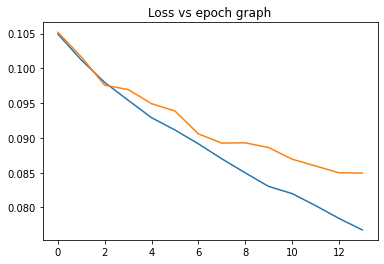

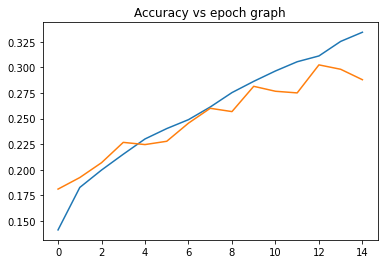

In [ ]:
train_loader = DataLoader(dataset.augmented_train, batch_size = 32, shuffle=True)
temp[0] = 2
val_loader = DataLoader(dataset.augmented_val, batch_size = 32, shuffle=True)
model4 = Classifier1(1,1,5,'max','rel')
loss_fun = CrossEntropyLoss()
optimizer = optim.Adam(params = model4.parameters())


train_losses, val_losses, train_accuracies, val_accuracies = train(train_loader, val_loader, epochs=15, model=model4, optimizer=optimizer, loss_fun=loss_fun, num=4)
ploting(train_losses,val_losses,train_accuracies,val_accuracies)

# Different activation function at the end


Epoch 1: Train loss = 0.12575234731038412 val_loss = 0.12572739124298096
        Train accuracy = 0.0833333358168602 val accuracy = 0.10999999940395355
------------------------------------------------------------------------------------------------------------------------------------------------------



Epoch 2: Train loss = 0.12347667296727498 val_loss = 0.12506049871444702
        Train accuracy = 0.08666666597127914 val accuracy = 0.11749999970197678
------------------------------------------------------------------------------------------------------------------------------------------------------



Epoch 3: Train loss = 0.12309223353862762 val_loss = 0.12490936696529388
        Train accuracy = 0.1066666692495346 val accuracy = 0.12999999523162842
------------------------------------------------------------------------------------------------------------------------------------------------------



Epoch 4: Train loss = 0.12254711508750915 val_loss = 0.12418006598949433
        Train accuracy = 0.1133333370089531 val accuracy = 0.14749999344348907
------------------------------------------------------------------------------------------------------------------------------------------------------



Epoch 5: Train loss = 0.12222071707248688 val_loss = 0.1239209920167923
        Train accuracy = 0.09583333134651184 val accuracy = 0.11999999731779099
------------------------------------------------------------------------------------------------------------------------------------------------------



Epoch 6: Train loss = 0.12166779100894928 val_loss = 0.1240403801202774
        Train accuracy = 0.10083333402872086 val accuracy = 0.17000000178813934
------------------------------------------------------------------------------------------------------------------------------------------------------



Epoch 7: Train loss = 0.12148036301136017 val_loss = 0.12375726282596589
        Train accuracy = 0.12666666507720947 val accuracy = 0.18000000715255737
------------------------------------------------------------------------------------------------------------------------------------------------------



Epoch 8: Train loss = 0.12117188970247904 val_loss = 0.12326970875263214
        Train accuracy = 0.1316666603088379 val accuracy = 0.18000000715255737
------------------------------------------------------------------------------------------------------------------------------------------------------



Epoch 9: Train loss = 0.12095455169677734 val_loss = 0.12335582971572875
        Train accuracy = 0.13083332777023315 val accuracy = 0.16750000417232513
------------------------------------------------------------------------------------------------------------------------------------------------------



Epoch 10: Train loss = 0.12062676191329956 val_loss = 0.12363712966442109
        Train accuracy = 0.13750000298023224 val accuracy = 0.17749999463558197
------------------------------------------------------------------------------------------------------------------------------------------------------



Epoch 11: Train loss = 0.12031180421511332 val_loss = 0.12379334628582
        Train accuracy = 0.12666666507720947 val accuracy = 0.16750000417232513
------------------------------------------------------------------------------------------------------------------------------------------------------



Epoch 12: Train loss = 0.12015059014161428 val_loss = 0.12302243649959564
        Train accuracy = 0.12666666507720947 val accuracy = 0.16750000417232513
------------------------------------------------------------------------------------------------------------------------------------------------------



Epoch 13: Train loss = 0.12021015365918478 val_loss = 0.12307646512985229
        Train accuracy = 0.14666666090488434 val accuracy = 0.17749999463558197
------------------------------------------------------------------------------------------------------------------------------------------------------



Epoch 14: Train loss = 0.11996489882469177 val_loss = 0.12339058637619019
        Train accuracy = 0.13083332777023315 val accuracy = 0.1525000035762787
------------------------------------------------------------------------------------------------------------------------------------------------------



Epoch 15: Train loss = 0.11977295140425365 val_loss = 0.1232663357257843
        Train accuracy = 0.1341666728258133 val accuracy = 0.1850000023841858
------------------------------------------------------------------------------------------------------------------------------------------------------


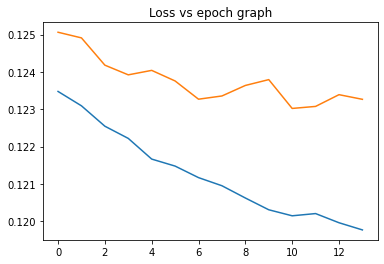

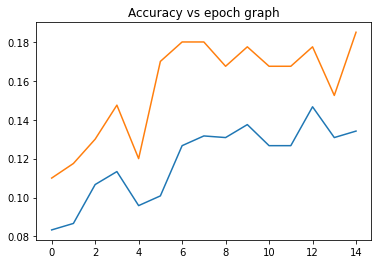

In [20]:
train_loader = DataLoader(dataset.augmented_train, batch_size = 32, shuffle=True)
temp[0] = 2
val_loader = DataLoader(dataset.augmented_val, batch_size = 32, shuffle=True)
model4 = Classifier1(1,1,6,'avg','sig')
loss_fun = CrossEntropyLoss()
optimizer = optim.Adam(params = model4.parameters())


train_losses, val_losses, train_accuracies, val_accuracies = train(train_loader, val_loader, epochs=15, model=model4, optimizer=optimizer, loss_fun=loss_fun, num=4)
ploting(train_losses,val_losses,train_accuracies,val_accuracies)